## This is the softmax workbook for ECE C147/C247 Assignment #2

Please follow the notebook linearly to implement a softmax classifier.

Please print out the workbook entirely when completed.

The goal of this workbook is to give you experience with training a softmax classifier.

In [1]:
import random
import numpy as np
from utils.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [107]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the
    SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/home/andrea/git/UCLA/UCLA_ECE147/Homework2/HW2_code/cifar-10-batches-py' # You need to update this line
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


## Training a softmax classifier.

The following cells will take you through building a softmax classifier.  You will implement its loss function, then subsequently train it with gradient descent.  Finally, you will choose the learning rate of gradient descent to optimize its classification performance.

In [108]:
from nndl import Softmax

In [109]:
# Declare an instance of the Softmax class.  
# Weights are initialized to a random value.
# Note, to keep people's first solutions consistent, we are going to use a random seed.

np.random.seed(1)

num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

softmax = Softmax(dims=[num_classes, num_features])

#### Softmax loss

In [129]:
## Implement the loss function of the softmax using a for loop over
#  the number of examples

unit_loss = softmax.loss(X_train, y_train)

In [120]:
print(loss)

2.3277607028048966


## Question: 

You'll notice the loss returned by the softmax is about 2.3 (if implemented correctly).  Why does this make sense?

## Answer:

The computed loss is the average loss per observation. The loss is $-2.3$, so the softmax per observation is $e^{-2.3}$, or about $\frac{1}{10}$. This makes perfect sense since $W$ is approximately $0$, so the softmax evaluates to $\textrm{softmax}_j(x^{i}) = \frac{e^{w_j^T x}}{\sum_{k=1}^{c} e^{w_k^T x}} \approx \frac{e^{0}}{\sum_{k=1}^{c} e^{0}} = \frac{1}{c} = \frac{1}{10}$ since we have $c=10$ classes.

#### Softmax gradient

In [261]:
## Calculate the gradient of the softmax loss in the Softmax class.
# For convenience, we'll write one function that computes the loss
#   and gradient together, softmax.loss_and_grad(X, y)
# You may copy and paste your loss code from softmax.loss() here, and then
#   use the appropriate intermediate values to calculate the gradient.

loss, grad = softmax.loss_and_grad(X_dev,y_dev)

# Compare your gradient to a gradient check we wrote. 
# You should see relative gradient errors on the order of 1e-07 or less if you implemented the gradient correctly.
softmax.grad_check_sparse(X_dev, y_dev, grad)

numerical: -0.412513 analytic: -0.412513, relative error: 3.100247e-08
numerical: 1.449105 analytic: 1.449105, relative error: 5.650975e-09
numerical: 2.770640 analytic: 2.770640, relative error: 2.425229e-09
numerical: -1.671566 analytic: -1.671566, relative error: 6.438381e-09
numerical: 2.540387 analytic: 2.540387, relative error: 9.276612e-09
numerical: 1.122858 analytic: 1.122858, relative error: 3.049509e-08
numerical: -0.832407 analytic: -0.832407, relative error: 2.164703e-08
numerical: 0.362969 analytic: 0.362969, relative error: 1.164066e-07
numerical: 0.110281 analytic: 0.110281, relative error: 2.015857e-09
numerical: 1.501076 analytic: 1.501076, relative error: 4.027766e-09


## A vectorized version of Softmax

To speed things up, we will vectorize the loss and gradient calculations.  This will be helpful for stochastic gradient descent.

In [262]:
import time

In [263]:
## Implement softmax.fast_loss_and_grad which calculates the loss and gradient
#    WITHOUT using any for loops.  

# Standard loss and gradient
tic = time.time()
loss, grad = softmax.loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Normal loss / grad_norm: {} / {} computed in {}s'.format(loss, np.linalg.norm(grad, 'fro'), toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = softmax.fast_loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Vectorized loss / grad: {} / {} computed in {}s'.format(loss_vectorized, np.linalg.norm(grad_vectorized, 'fro'), toc - tic))

# The losses should match but your vectorized implementation should be much faster.
print('difference in loss / grad: {} /{} '.format(loss - loss_vectorized, np.linalg.norm(grad - grad_vectorized)))

# You should notice a speedup with the same output.

Normal loss / grad_norm: 2.3271336756111975 / 316.2043429344621 computed in 0.06460165977478027s
Vectorized loss / grad: 2.327133675611197 / 316.2043429344621 computed in 0.004245758056640625s
difference in loss / grad: 4.440892098500626e-16 /2.359453427692796e-13 


## Stochastic gradient descent

We now implement stochastic gradient descent.  This uses the same principles of gradient descent we discussed in class, however, it calculates the gradient by only using examples from a subset of the training set (so each gradient calculation is faster).

iteration 0 / 1500: loss 2.3762751114287943
iteration 100 / 1500: loss 2.076086118619406
iteration 200 / 1500: loss 2.067041703893229
iteration 300 / 1500: loss 1.9796769840619515
iteration 400 / 1500: loss 1.8270526124815358
iteration 500 / 1500: loss 1.7680983550326121
iteration 600 / 1500: loss 1.8455566105812704
iteration 700 / 1500: loss 1.960219026122504
iteration 800 / 1500: loss 1.8611293417615247
iteration 900 / 1500: loss 1.7590826893658758
iteration 1000 / 1500: loss 1.821829237861987
iteration 1100 / 1500: loss 1.8012093950570955
iteration 1200 / 1500: loss 1.810574438016967
iteration 1300 / 1500: loss 1.924711064381258
iteration 1400 / 1500: loss 1.8759793554305062
That took 6.072973012924194s


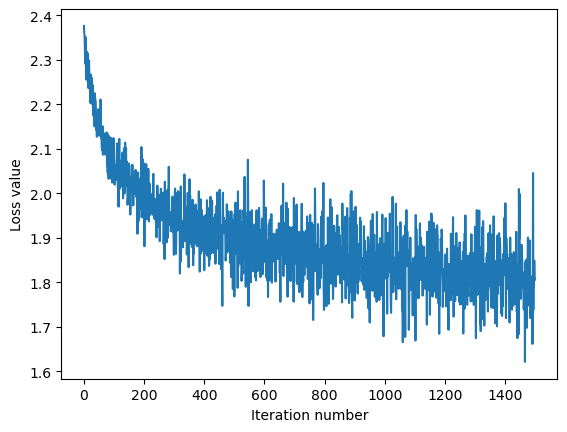

In [269]:
# Implement softmax.train() by filling in the code to extract a batch of data
# and perform the gradient step.
import time


tic = time.time()
loss_hist = softmax.train(X_train, y_train, learning_rate=1e-7,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took {}s'.format(toc - tic))

plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

### Evaluate the performance of the trained softmax classifier on the validation data.

In [270]:
## Implement softmax.predict() and use it to compute the training and testing error.

y_train_pred = softmax.predict(X_train)
print('training accuracy: {}'.format(np.mean(np.equal(y_train,y_train_pred), )))
y_val_pred = softmax.predict(X_val)
print('validation accuracy: {}'.format(np.mean(np.equal(y_val, y_val_pred)), ))

training accuracy: 0.3793061224489796
validation accuracy: 0.384


## Optimize the softmax classifier

In [276]:
# ================================================================ #
# YOUR CODE HERE:
#   Train the Softmax classifier with different learning rates and 
#     evaluate on the validation data.
#   Report:
#     - The best learning rate of the ones you tested.  
#     - The best validation accuracy corresponding to the best validation error.
#
#   Select the SVM that achieved the best validation error and report
#     its error rate on the test set.
# ================================================================ #

learning_rates = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
W = np.random.normal(size=[num_classes, num_features]) * 0.0001
results = np.zeros((len(learning_rates), 2))

for i, e in enumerate(learning_rates):
    softmax.W = W
    loss_history = softmax.train(X_train, y_train, learning_rate=e,
                      num_iters=1500, verbose=False)
    
    y_train_pred = softmax.predict(X_train)
    print('training accuracy for learning rate {}: {}'.format(e, np.mean(np.equal(y_train,y_train_pred), )))
    y_val_pred = softmax.predict(X_val)
    print('validation accuracy: {}'.format(np.mean(np.equal(y_val, y_val_pred)), ))
    results[i][0] = np.mean(np.equal(y_val, y_val_pred))
    results[i][1] = loss_history[-1]

best_rate_idx = np.argmin(results[:,1])
print("The best learning rate was:", learning_rates[best_rate_idx])
print("It achieved a final loss of:", results[best_rate_idx][1])
print("The corresponding validation accuracy of:", results[best_rate_idx][0])
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #


training accuracy for learning rate 1e-09: 0.17146938775510204
validation accuracy: 0.166
training accuracy for learning rate 1e-08: 0.2841836734693878
validation accuracy: 0.301
training accuracy for learning rate 1e-07: 0.38124489795918365
validation accuracy: 0.378
training accuracy for learning rate 1e-06: 0.4179795918367347
validation accuracy: 0.4
training accuracy for learning rate 1e-05: 0.3409387755102041
validation accuracy: 0.322
The best learning rate was: 1e-06
It achieved a final loss of: 1.6598466343248017
The corresponding validation accuracy of: 0.4
